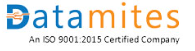

**Project Team ID**: PTID-CDS-OCT-23-1670

**Project id**: Business Case for PRCL-0012

**Submitted by**: Anjani Kumar

# **ITSM (IT Service Management)**

---------
## **Business Case-Study**

ABC Tech is an mid-size organisation operation in IT-enabled business
segment over a decade. On an average ABC Tech receives 22-25k IT
incidents/tickets , which were handled to best practice ITIL framework
with incident management , problem management, change management
and configuration management processes. These ITIL practices attained
matured process level and a recent audit confirmed that further
improvement initiatives may not yield return of investment.
ABC Tech management is looking for ways to improve the incident
management process as recent customer survey results shows that
incident management is rated as poor.

Machine learning looks prospective to improve ITSM processes through
prediction and automation. They came up with key areas, where ML can
help ITSM process in ABC Tech.

**1)** Predicting High Priority Tickets so that they can take preventive measures or fix the problem before it surfaces.

**2)** Forecast the incident volume monthwise and quarterwise. So that they can be better prepared with resources and technology planning.

**3)** Auto tag the tickets with right priorities and right departments so
that reassigning and related delay can be reduced.

--------
## **Dataset Description**

This Dataset contain Total of 24 features and 1 Target(Priority)

1) CI_Name: Represents the Configuration Item (CI) Name, which is an element of
the IT infrastructure that is managed in the context of IT Service Management.

2) CI_Cat: Denotes the category of the Configuration Item.

3) CI_Subcat: Specifies the subcategory of the Configuration Item. It provides more detailed information about the type of CI.

4) WBS: Stands for Work Breakdown Structure. It is a project management tool that represents a hierarchical decomposition of the total scope of work to be carried out by the project team.

5) Incident_ID: Unique identifier for each incident. It is a reference number or code assigned to each reported incident.

6) Status: Represents the current status of the incident.

7) Impact: Indicates the impact of the incident on the business or IT services.

8) Urgency: Reflects the urgency of addressing the incident.

9) Priority: Represents the overall priority assigned to the incident, which is often a combination of impact and urgency.

10) number_cnt: It's not explicitly described, but it may be a numerical count  associated with something in the dataset.

11) Category: Denotes the category of the incident, providing additional classification information.

12) KB_number: May refer to a Knowledge Base (KB) article number. Knowledge base articles are often used for documenting solutions to common issues.

13) Alert_Status: Represents the status of any alerts associated with the incident.

14) No_of_Reassignments: Indicates the number of times the incident has been reassigned or transferred to different support personnel or groups.

15) Open_Time: Represents the timestamp when the incident was initially reported or opened.

16) Reopen_Time: Timestamp indicating when the incident was reopened, if applicable.

17) Resolved_Time: Timestamp indicating when the incident was resolved or fixed.

18) Close_Time: Timestamp indicating when the incident was closed or marked as completed.

19) Handle_Time_hrs: Represents the time taken to handle or resolve the incident, often measured in hours.

20) Closure_Code: Denotes the code or reason for closing the incident.

21) No_of_Related_Interactions: Indicates the number of related interactions associated with the incident.

22) Related_Interaction: Information about the related interactions associated with the incident.

23) No_of_Related_Incidents: Represents the number of incidents related to the current incident.

24) No_of_Related_Changes: Indicates the number of related changes associated   with the incident.

25) Related_Change: Information about the related changes associated with the incident.

--------
--------
## **Objective: Predicting High Priority Tickets**
--------
--------

## **Importing Necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
from sklearn.metrics import classification_report,f1_score,accuracy_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

-------------------------------
## **SQL for Data Gathering**

In [ ]:
!pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247952 sha256=d7fbfcd3c1e743642eede4dec402b5c957efe728e880378e2ce28242ce966d39
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector


In [ ]:
import os
import mysql.connector

In [ ]:
connection = mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!')

In [ ]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print('Databases:',i)

Databases: ('information_schema',)
Databases: ('project_itsm',)


In [ ]:
connection = mysql.connector.connect(host='18.136.157.135',user='dm_team',password='DM!$Team@&27920!',database='project_itsm')

In [ ]:
table = pd.read_sql('show tables',connection)
table

,Tables_in_project_itsm
0,dataset_list


In [ ]:
table=pd.read_sql('select * from dataset_list',connection)
df=table.copy()

---
## **Basic Info**

In [ ]:
pd.set_option('display.max_columns',None)
print('Shape:',df.shape)
df.head()

Shape: (46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [ ]:
df.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [ ]:
df.describe(include='O')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [ ]:
# Checking for Duplicated values:
df[df.duplicated()]

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change


-----
## **EDA**

In [ ]:
# Dataset contain many empty cells in some features, so we are converting it into null values:
for x in df:
    df.loc[df[x]=='',x]=None
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [ ]:
# We will drop these features since it have more than 95% null values
df.drop(['Reopen_Time','No_of_Related_Incidents','No_of_Related_Changes','Related_Change'],axis=1,inplace=True)

In [ ]:
print('CI_Name have unique:',len(df['CI_Name'].unique()))
print('WBS have unique:',len(df['WBS'].unique()))
print('Incident_ID have unique:',len(df['Incident_ID'].unique()))
print('number_cnt have unique:',len(df['number_cnt'].unique()))
print('KB_number have unique:',len(df['KB_number'].unique()))
print('Related_Interaction have unique:',len(df['Related_Interaction'].unique()))
df[['CI_Name','WBS','Incident_ID','number_cnt','KB_number','Related_Interaction']].head()

CI_Name have unique: 3019
WBS have unique: 274
Incident_ID have unique: 46606
number_cnt have unique: 46606
KB_number have unique: 1825
Related_Interaction have unique: 43060


,CI_Name,WBS,Incident_ID,number_cnt,KB_number,Related_Interaction
0,SUB000508,WBS000162,IM0000004,0.601292279,KM0000553,SD0000007
1,WBA000124,WBS000088,IM0000005,0.415049969,KM0000611,SD0000011
2,DTA000024,WBS000092,IM0000006,0.517551335,KM0000339,SD0000017
3,WBA000124,WBS000088,IM0000011,0.642927218,KM0000611,SD0000025
4,WBA000124,WBS000088,IM0000012,0.345258343,KM0000611,SD0000029


In [ ]:
# There is no meaning to keep these features, since they have many unique values. So we will drop these:
df.drop(['CI_Name','WBS','Incident_ID','number_cnt','KB_number','Related_Interaction'],axis=1,inplace=True)

In [ ]:
# So we will drop this also since it have constant values
print(df['Alert_Status'].unique())
df.drop('Alert_Status',axis=1,inplace=True)

['closed']


In [ ]:
# Target:
print(df['Priority'].value_counts())

4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: Priority, dtype: int64


In [ ]:
# 1380 rows have NA(Not applicable) priority which should be removed from dataset.
df.drop(df[df['Priority']=='NA'].index,inplace=True,axis=0)

In [ ]:
# Impact
print(df['Impact'].value_counts())

4    22556
5    16741
3     5234
2      692
1        3
Name: Impact, dtype: int64


In [ ]:
# Urgency
print(df['Urgency'].value_counts())
df['Urgency'].replace({'5 - Very Low':'5'},inplace=True)

4               22556
5               16779
3                5188
2                 696
1                   6
5 - Very Low        1
Name: Urgency, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45226 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Cat                      45118 non-null  object
 1   CI_Subcat                   45118 non-null  object
 2   Status                      45226 non-null  object
 3   Impact                      45226 non-null  object
 4   Urgency                     45226 non-null  object
 5   Priority                    45226 non-null  object
 6   Category                    45226 non-null  object
 7   No_of_Reassignments         45225 non-null  object
 8   Open_Time                   45226 non-null  object
 9   Resolved_Time               43582 non-null  object
 10  Close_Time                  45226 non-null  object
 11  Handle_Time_hrs             45225 non-null  object
 12  Closure_Code                44777 non-null  object
 13  No_of_Related_Interactions  45112 non-null  ob

In [ ]:
# First convert datatype of these features
df['Priority']=pd.to_numeric(df['Priority'])
df['Impact']=pd.to_numeric(df['Impact'])
df['Urgency']=pd.to_numeric(df['Urgency'])
df['No_of_Reassignments']= pd.to_numeric(df['No_of_Reassignments'])
df['Open_Time']= pd.to_datetime(df['Open_Time'])
df['Resolved_Time']= pd.to_datetime(df['Resolved_Time'])
df['Close_Time']= pd.to_datetime(df['Close_Time'])
df['No_of_Related_Interactions']= pd.to_numeric(df['No_of_Related_Interactions'])

In [ ]:
# Open Time should be less than Resolve time but in some datas open time is greater than resolve time which is not possible, so we are dropping 8.258% those rows.
df.drop(df.loc[df['Open_Time']>df['Resolved_Time']].index,inplace=True,axis=0)

In [ ]:
# Given Handle_Time is recalculated from open time and resolved time.
Handle_Time = df['Resolved_Time']- df['Open_Time']
day = Handle_Time.dt.days*24
hour = Handle_Time.dt.components['hours']
minute = Handle_Time.dt.components['minutes']/60
second = Handle_Time.dt.components['seconds']/3600
df['Handle_Time_hrs'] = day+hour+minute+second

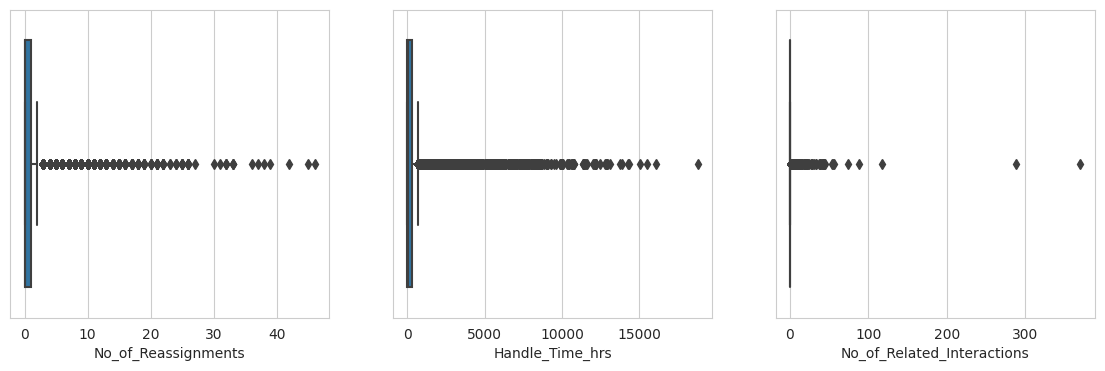

In [ ]:
# Boxplot
plt.figure(figsize=(14,4))
i=1
for j in ['No_of_Reassignments','Handle_Time_hrs','No_of_Related_Interactions']:
  plt.subplot(1,3,i)
  sns.boxplot(data=df,x=j)
  i+=1
plt.show()

In [ ]:
# Since handle time was recalculated by us and for this model we do not want it to exceed from 6 month=(365/2)*24 = 4380 hrs.
print(len(df[df['Handle_Time_hrs']>4380]))
df.drop(df[df['Handle_Time_hrs']>4380].index,axis=0,inplace=True)

1621


In [ ]:
# No of related interactions have outliers.
print(len(df[df['No_of_Related_Interactions']>200]))
df.drop(df[df['No_of_Related_Interactions']>200].index,axis=0,inplace=True)

2


In [ ]:
# Checking null values again:
df.isnull().sum()

CI_Cat                         100
CI_Subcat                      100
Status                           0
Impact                           0
Urgency                          0
Priority                         0
Category                         0
No_of_Reassignments              1
Open_Time                        0
Resolved_Time                 1644
Close_Time                       0
Handle_Time_hrs               1644
Closure_Code                   449
No_of_Related_Interactions     110
dtype: int64

In [ ]:
# Impute null value with mode and median according to dataset features
df.loc[df['CI_Cat'].isnull(),'CI_Cat']=df['CI_Cat'].mode().iloc[0]
df.loc[df['CI_Subcat'].isnull(),'CI_Subcat']=df['CI_Subcat'].mode().iloc[0]
df.loc[df['Closure_Code'].isnull(),'Closure_Code']=df['Closure_Code'].mode().iloc[0]

df.loc[df['No_of_Reassignments'].isnull(),'No_of_Reassignments']=df['No_of_Reassignments'].median()
df.loc[df['Resolved_Time'].isnull(),'Resolved_Time']=df['Resolved_Time'].median()
df.loc[df['Handle_Time_hrs'].isnull(),'Handle_Time_hrs']=df['Handle_Time_hrs'].median()
df.loc[df['No_of_Related_Interactions'].isnull(),'No_of_Related_Interactions']=df['No_of_Related_Interactions'].median()

In [ ]:
df.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'Category', 'No_of_Reassignments', 'Open_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions'],
      dtype='object')

In [ ]:
# Now Divide df into categorical and numerical features
cat=df[['CI_Cat','CI_Subcat','Status','Impact','Urgency','Category','Closure_Code']]
num=df[['No_of_Reassignments','Open_Time','Resolved_Time','Close_Time','Handle_Time_hrs','No_of_Related_Interactions']]

In [ ]:
# Analyzing Categorical data
print('Shape:',cat.shape)
cat.head()

Shape: (39868, 7)


,CI_Cat,CI_Subcat,Status,Impact,Urgency,Category,Closure_Code
1,application,Web Based Application,Closed,3,3,incident,Software
13,application,Web Based Application,Closed,4,4,incident,Software
27,application,Server Based Application,Closed,5,5,request for information,No error - works as designed
28,application,Server Based Application,Closed,5,5,request for information,Other
29,application,Server Based Application,Closed,5,5,request for information,Other


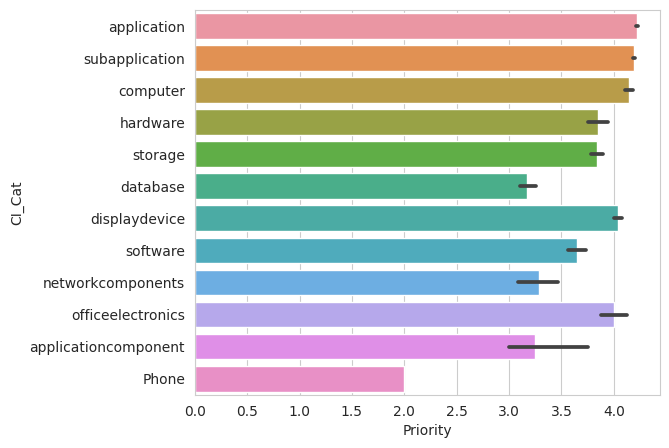

In [ ]:
# Graphical Representation of Categorical data.
plt.figure(figsize=(6,5))
sns.barplot(data=cat,x=df['Priority'],y='CI_Cat')
plt.show()

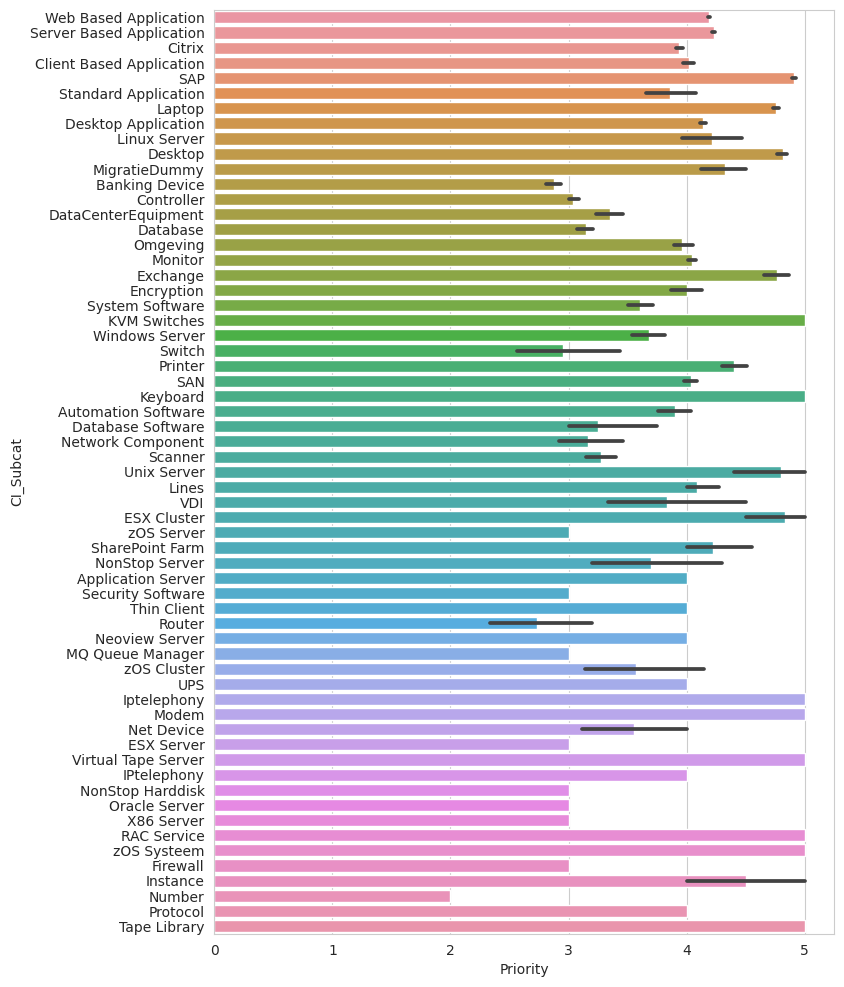

In [ ]:
plt.figure(figsize=(8,12))
sns.barplot(data=cat,x=df['Priority'],y='CI_Subcat')
plt.show()

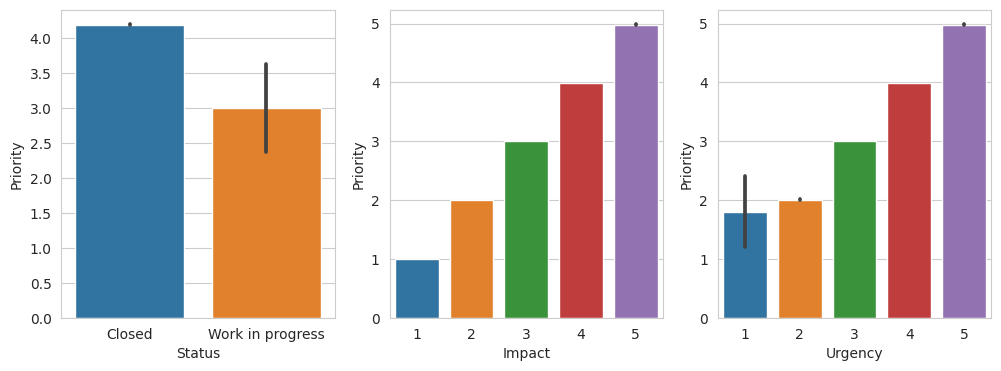

In [ ]:
plt.figure(figsize=(12,4))
i=1
for j in ['Status','Impact','Urgency']:
  plt.subplot(1,3,i)
  sns.barplot(data=cat,x=j,y=df['Priority'])
  i+=1
plt.show()

In [ ]:
cat['Status'].value_counts()

Closed              39860
Work in progress        8
Name: Status, dtype: int64

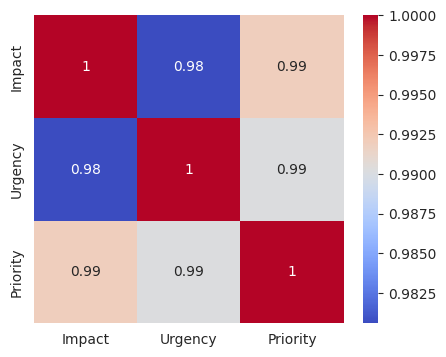

In [ ]:
# Heatmap to check correlation.
plt.figure(figsize=(5,4))
sns.heatmap(df[['Impact','Urgency','Priority']].corr(),annot=True,cmap='coolwarm')
plt.show()
# It have high correlation with Priority, so we have to remove it.

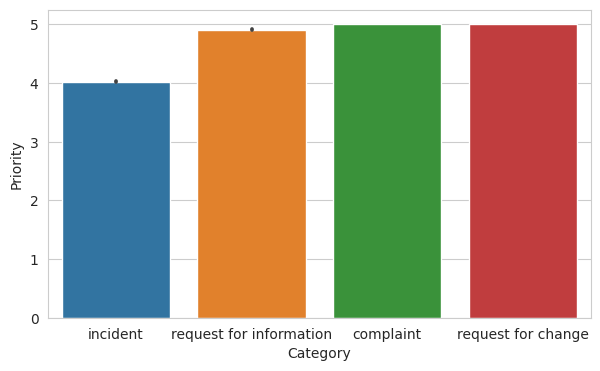

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=cat,y=df['Priority'],x='Category')
plt.show()

In [ ]:
cat['Category'].value_counts()

incident                   32271
request for information     7586
complaint                     10
request for change             1
Name: Category, dtype: int64

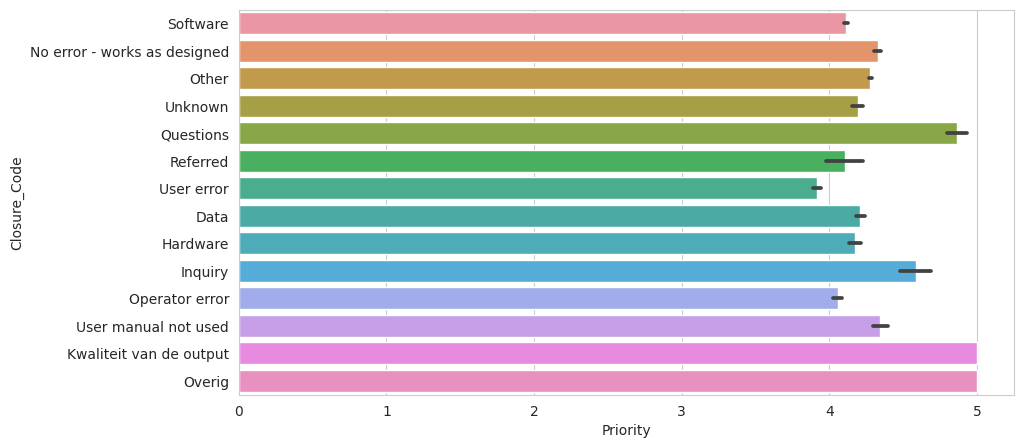

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=cat,y='Closure_Code',x=df['Priority'])
plt.show()

### **Analysis for Categorical data:**

1) For CI_Cat graph, it is not an ordinal data so we have to perform one hot encoding in preprocessing.

2) For CI_Subcat graph, it is not an ordinal data so we have to perform one hot encoding in preprocessing.

3) For Status graph, all new user data will come under work in progress, so there is no meaning to keep that feature.

4) Impact and Urgency have proportional relationship with Priority.

5) For Impact and Urgency, it have high correlation with Priority so we have to drop these features.

6) For Category graph, it is not an ordinal data so we have to perform one hot encoding in preprocessing.

7) For Closure_Code graph, it is not an ordinal data so we have to perform one hot encoding in preprocessing.

In [ ]:
cat.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Category,Closure_Code
1,application,Web Based Application,Closed,3,3,incident,Software
13,application,Web Based Application,Closed,4,4,incident,Software
27,application,Server Based Application,Closed,5,5,request for information,No error - works as designed
28,application,Server Based Application,Closed,5,5,request for information,Other
29,application,Server Based Application,Closed,5,5,request for information,Other


In [ ]:
# Thus we will remove Impact and Urgency since they have more than 98% correlation with Priority.
cat.drop(['Status','Impact','Urgency'],axis=1,inplace=True)
cat.head()

,CI_Cat,CI_Subcat,Category,Closure_Code
1,application,Web Based Application,incident,Software
13,application,Web Based Application,incident,Software
27,application,Server Based Application,request for information,No error - works as designed
28,application,Server Based Application,request for information,Other
29,application,Server Based Application,request for information,Other


In [ ]:
# Analysing Numerical data
num.head()

,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions
1,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1700.866667,1.0
13,17.0,2012-10-15 15:50:00,2014-01-13 10:57:00,2013-11-14 13:33:00,6.200000,1.0
27,0.0,2013-06-02 14:07:00,2013-10-17 14:00:00,2013-10-17 14:00:00,3287.883333,2.0
28,11.0,2013-08-02 10:47:00,2013-10-17 15:40:00,2013-10-17 15:40:00,1828.883333,1.0
29,2.0,2013-02-18 11:59:00,2014-01-13 10:57:00,2013-04-12 14:00:00,6.200000,2.0


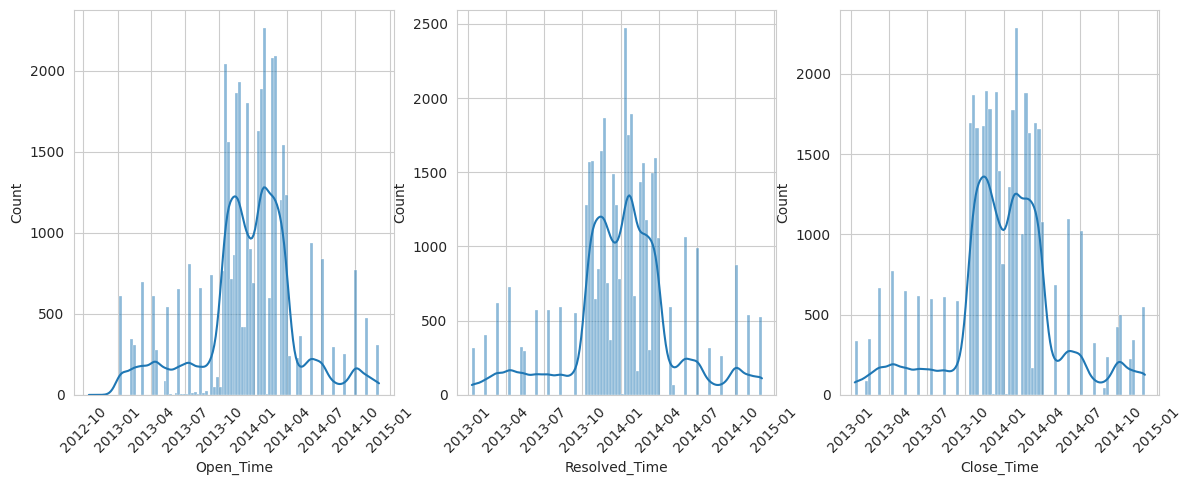

In [ ]:
# Graphical Representation of Numerical features
plt.figure(figsize=(14,5))
i=1
for j in ['Open_Time','Resolved_Time','Close_Time']:
  plt.subplot(1,3,i)
  sns.histplot(data=num,x=j,kde=True)
  plt.xticks(rotation=45)
  i+=1
plt.show()

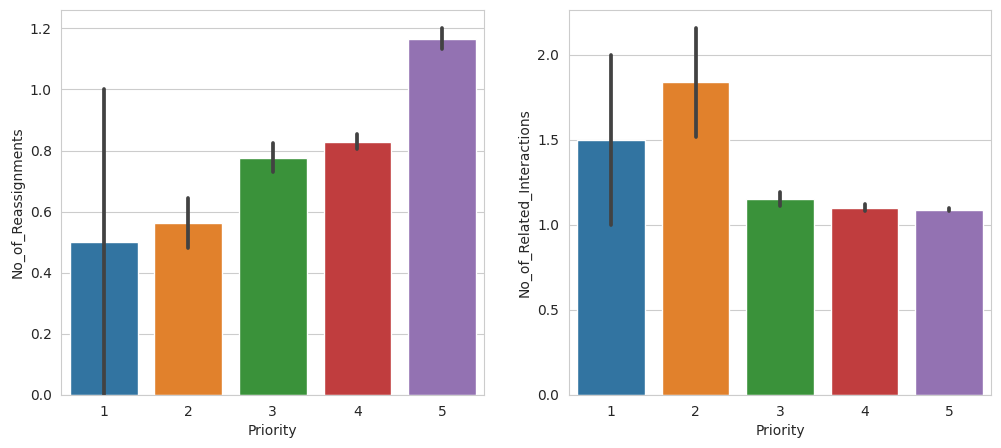

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=num,x=df['Priority'],y='No_of_Reassignments')
plt.subplot(1,2,2)
sns.barplot(data=num,x=df['Priority'],y='No_of_Related_Interactions')
plt.show()

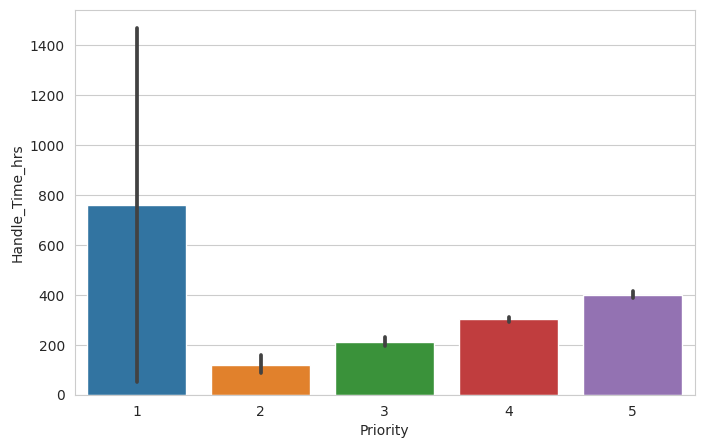

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=num,x=df['Priority'],y='Handle_Time_hrs')
plt.show()

### **Analysis for Numerical data:**

1) Open_Time, Resolved_Time and Close_Time have almost uniform distribution with time zone.

2) We re-created Handle_Time_hrs from Open_Time and Resolved_Time that's why we do no need these three time features.

2) As No_of_Reassignments increase, Priority also increases means they have directly proportional to each other.

3) As No_of Related_Interactions decrease, Priority increases means they have inversely proportional to each other.

4) Handle_Time_hrs have very good relation with Priority as it increases with Priority from 2 to 5.


In [ ]:
# Dropping these features:
num.drop(['Open_Time','Resolved_Time','Close_Time'],axis=1,inplace=True)
num.head()

,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
1,33.0,1700.866667,1.0
13,17.0,6.200000,1.0
27,0.0,3287.883333,2.0
28,11.0,1828.883333,1.0
29,2.0,6.200000,2.0


--------
## **Preprocessing**

In [ ]:
cat.head()

,CI_Cat,CI_Subcat,Category,Closure_Code
1,application,Web Based Application,incident,Software
13,application,Web Based Application,incident,Software
27,application,Server Based Application,request for information,No error - works as designed
28,application,Server Based Application,request for information,Other
29,application,Server Based Application,request for information,Other


In [ ]:
# One hot encoding of these features
CI_Cat = pd.get_dummies(data=df['CI_Cat'])
CI_Subcat = pd.get_dummies(data=df['CI_Subcat'])
Category = pd.get_dummies(data=df['Category'])
Closure_Code = pd.get_dummies(data=df['Closure_Code'])

In [ ]:
cats=pd.concat([cat,CI_Cat,CI_Subcat,Category,Closure_Code],axis=1)
cats.drop(['CI_Cat','CI_Subcat','Category','Closure_Code'],axis=1,inplace=True)
print('Shape:',cats.shape)
cats.head()

Shape: (39868, 91)


,Phone,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,Application Server,Automation Software,Banking Device,Citrix,Client Based Application,Controller,DataCenterEquipment,Database,Database Software,Desktop,Desktop Application,ESX Cluster,ESX Server,Encryption,Exchange,Firewall,IPtelephony,Instance,Iptelephony,KVM Switches,Keyboard,Laptop,Lines,Linux Server,MQ Queue Manager,MigratieDummy,Modem,Monitor,Neoview Server,Net Device,Network Component,NonStop Harddisk,NonStop Server,Number,Omgeving,Oracle Server,Printer,Protocol,RAC Service,Router,SAN,SAP,Scanner,Security Software,Server Based Application,SharePoint Farm,Standard Application,Switch,System Software,Tape Library,Thin Client,UPS,Unix Server,VDI,Virtual Tape Server,Web Based Application,Windows Server,X86 Server,zOS Cluster,zOS Server,zOS Systeem,complaint,incident,request for change,request for information,Data,Hardware,Inquiry,Kwaliteit van de output,No error - works as designed,Operator error,Other,Overig,Questions,Referred,Software,Unknown,User error,User manual not used
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
num.head()

,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
1,33.0,1700.866667,1.0
13,17.0,6.200000,1.0
27,0.0,3287.883333,2.0
28,11.0,1828.883333,1.0
29,2.0,6.200000,2.0


In [ ]:
# Merge the cats and num and Priority into one dataframe.
combine_df=pd.concat([cats,num,df['Priority']],axis=1)
print('Shape:',combine_df.shape)
combine_df.head()

Shape: (39868, 95)


,Phone,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,Application Server,Automation Software,Banking Device,Citrix,Client Based Application,Controller,DataCenterEquipment,Database,Database Software,Desktop,Desktop Application,ESX Cluster,ESX Server,Encryption,Exchange,Firewall,IPtelephony,Instance,Iptelephony,KVM Switches,Keyboard,Laptop,Lines,Linux Server,MQ Queue Manager,MigratieDummy,Modem,Monitor,Neoview Server,Net Device,Network Component,NonStop Harddisk,NonStop Server,Number,Omgeving,Oracle Server,Printer,Protocol,RAC Service,Router,SAN,SAP,Scanner,Security Software,Server Based Application,SharePoint Farm,Standard Application,Switch,System Software,Tape Library,Thin Client,UPS,Unix Server,VDI,Virtual Tape Server,Web Based Application,Windows Server,X86 Server,zOS Cluster,zOS Server,zOS Systeem,complaint,incident,request for change,request for information,Data,Hardware,Inquiry,Kwaliteit van de output,No error - works as designed,Operator error,Other,Overig,Questions,Referred,Software,Unknown,User error,User manual not used,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions,Priority
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,33.0,1700.866667,1.0,3
13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17.0,6.200000,1.0,4
27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,3287.883333,2.0,5
28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11.0,1828.883333,1.0,5
29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.0,6.200000,2.0,5


------
## **Model Creation**

**1) Decision Tree**

**2) Random Forest**

**3) Gradient Boosting**

In [ ]:
X = combine_df.drop(['Priority'],axis=1)
Y = combine_df['Priority']
Y.value_counts()

4    20303
5    13914
3     4966
2      683
1        2
Name: Priority, dtype: int64

In [ ]:
# We have to scale entire dataset between 0 to 1 that is MinMAx scaling because Handle_Time_hrs feature should not goes below zero.
# After scaling we got dataset into array format so we converted that dataset into dataframe also.
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
X_scaled=MMS.fit_transform(X)
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns)
print('Shape:',X_scaled_df.shape)
X_scaled_df.head()

Shape: (39868, 94)


,Phone,application,applicationcomponent,computer,database,displaydevice,hardware,networkcomponents,officeelectronics,software,storage,subapplication,Application Server,Automation Software,Banking Device,Citrix,Client Based Application,Controller,DataCenterEquipment,Database,Database Software,Desktop,Desktop Application,ESX Cluster,ESX Server,Encryption,Exchange,Firewall,IPtelephony,Instance,Iptelephony,KVM Switches,Keyboard,Laptop,Lines,Linux Server,MQ Queue Manager,MigratieDummy,Modem,Monitor,Neoview Server,Net Device,Network Component,NonStop Harddisk,NonStop Server,Number,Omgeving,Oracle Server,Printer,Protocol,RAC Service,Router,SAN,SAP,Scanner,Security Software,Server Based Application,SharePoint Farm,Standard Application,Switch,System Software,Tape Library,Thin Client,UPS,Unix Server,VDI,Virtual Tape Server,Web Based Application,Windows Server,X86 Server,zOS Cluster,zOS Server,zOS Systeem,complaint,incident,request for change,request for information,Data,Hardware,Inquiry,Kwaliteit van de output,No error - works as designed,Operator error,Other,Overig,Questions,Referred,Software,Unknown,User error,User manual not used,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.733333,0.388734,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.377778,0.001417,0.000000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.751447,0.008547
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244444,0.417992,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044444,0.001417,0.008547


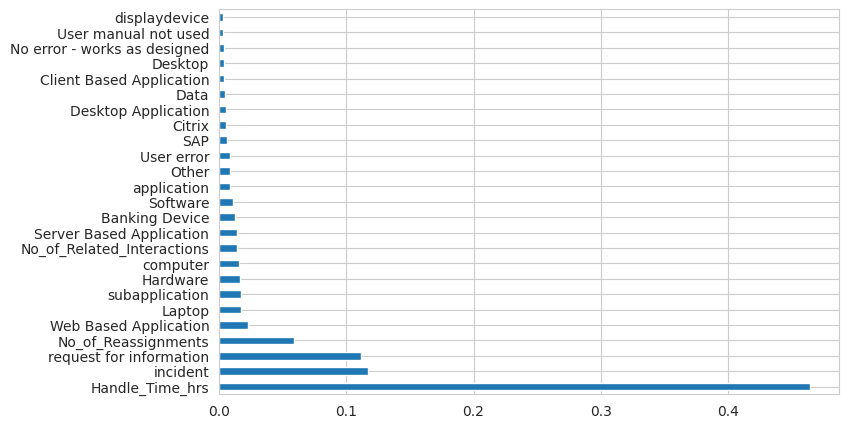

In [ ]:
# We are analysing that which 25 features are most important in the datasets using ExtraTreesClassifier.

from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X_scaled_df,Y)

plt.figure(figsize=(8,5))
feat_importances = pd.Series(ETC.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
# We took 80% dataset for training purpose and remaining 20% dataset for testing purpose because our dataset is very small.
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_scaled_df,Y,test_size=0.20)
print('Xtrain shape:',Xtrain.shape)
print('Xtest shape:',Xtest.shape)

Xtrain shape: (31894, 94)
Xtest shape: (7974, 94)


### **1st Model: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
# Prediction of Test data
Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_acc_score=accuracy_score(Ytest,Ypred)
print(DTC_acc_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.46      0.47      0.47       148
           3       0.40      0.42      0.41       966
           4       0.71      0.74      0.73      4073
           5       0.73      0.68      0.70      2786

    accuracy                           0.67      7974
   macro avg       0.46      0.46      0.46      7974
weighted avg       0.68      0.67      0.68      7974

0.6748181590168046


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# Model overfitted since training accuracy is 94% while testing accuracy is 68%. So we will apply Hyperparameter.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.72      0.90      0.80       535
           3       0.87      0.88      0.87      4000
           4       0.93      0.97      0.95     16230
           5       0.99      0.92      0.95     11128

    accuracy                           0.94     31894
   macro avg       0.90      0.93      0.92     31894
weighted avg       0.94      0.94      0.94     31894

0.9371668652411111


In [ ]:
# Hyperparameter of Decision Tree : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
#                                   we make grid and then fit the model into it, and then predict the testing accuracy.

from sklearn.model_selection import RandomizedSearchCV
parameter = {"criterion":('gini','entropy'),"splitter":("best","random"),"max_depth":(list(range(8, 18))),
             "min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
DTC=DecisionTreeClassifier()
Grid=RandomizedSearchCV(estimator=DTC,param_distributions=parameter,scoring="f1",cv=3,random_state=42)
Grid.fit(Xtrain,Ytrain)
print('Best parameters:',Grid.best_params_)

Best parameters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
DTC_params=['splitter:best,min_samples_split:3,min_samples_leaf:4,max_depth:15,criterion:entropy']
print('Best parameter for Decision Tree:','\n',DTC_params)

Best parameter for Decision Tree: 
 ['splitter:best,min_samples_split:3,min_samples_leaf:4,max_depth:15,criterion:entropy']


In [ ]:
# We put these best parameter and then train model again.
DTC = DecisionTreeClassifier(splitter='best',min_samples_split=3,min_samples_leaf=4,max_depth=15,criterion='entropy')
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=3)

In [ ]:
# Prediction of Test data
Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_acc_score_Hyper=accuracy_score(Ytest,Ypred)
print(DTC_acc_score_Hyper)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.52      0.52      0.52       148
           3       0.63      0.31      0.42       966
           4       0.70      0.89      0.78      4073
           5       0.84      0.65      0.73      2786

    accuracy                           0.73      7974
   macro avg       0.54      0.48      0.49      7974
weighted avg       0.74      0.73      0.72      7974

0.7310007524454477


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# No overfitting.

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.58      0.63      0.60       535
           3       0.76      0.37      0.50      4000
           4       0.73      0.92      0.81     16230
           5       0.89      0.70      0.78     11128

    accuracy                           0.77     31894
   macro avg       0.59      0.52      0.54     31894
weighted avg       0.78      0.77      0.76     31894

0.7705211011475512


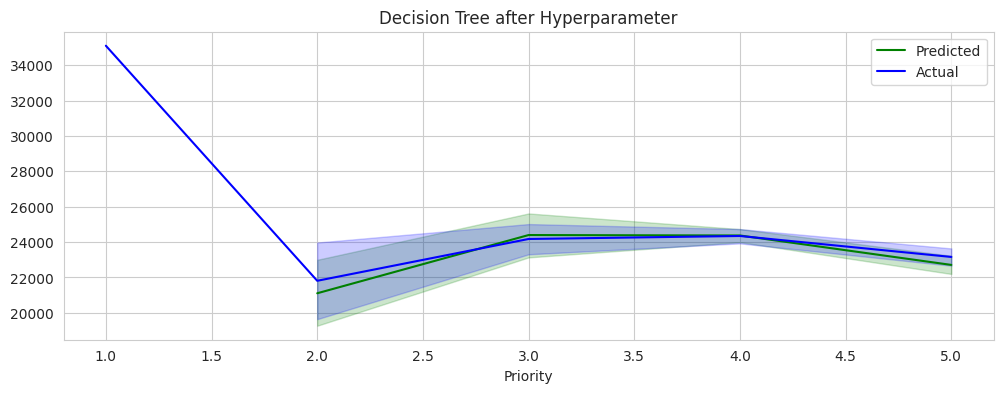

In [ ]:
# Graphical representation of Ytest and Ypred for Decision Tree
plt.figure(figsize=(12,4))
plt.title('Decision Tree after Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### **2nd Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
# Prediction of Test data
Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_acc_score=accuracy_score(Ytest,Ypred)
print(RFC_acc_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.55      0.51      0.53       148
           3       0.46      0.44      0.45       966
           4       0.73      0.76      0.75      4073
           5       0.73      0.70      0.71      2786

    accuracy                           0.70      7974
   macro avg       0.50      0.48      0.49      7974
weighted avg       0.69      0.70      0.69      7974

0.6960120391271633


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# Model overfitted since training accuracy is 94% while testing accuracy is 70%. So we will apply Hyperparameter.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.74      0.86      0.80       535
           3       0.91      0.84      0.87      4000
           4       0.93      0.97      0.95     16230
           5       0.98      0.93      0.95     11128

    accuracy                           0.94     31894
   macro avg       0.91      0.92      0.91     31894
weighted avg       0.94      0.94      0.94     31894

0.9370100959428106


In [ ]:
# Hyperparameter of Random Forest : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
#                                   we make grid and then fit the model into it, and then predict the testing accuracy.

from sklearn.model_selection import RandomizedSearchCV
parameter = {"n_estimators":[100,200,300,400,500,600],"max_features":['auto', 'sqrt'],"bootstrap":[True, False],"criterion":('gini','entropy'),
             "max_depth":(list(range(8, 18))),"min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
RFC=RandomForestClassifier()
Grid=RandomizedSearchCV(estimator=RFC,param_distributions=parameter,scoring="f1",cv=3,verbose=1,random_state=42)
Grid.fit(Xtrain,Ytrain)
print(Grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}


In [ ]:
RFC_params=['n_estimators:500, min_samples_split:5, min_samples_leaf:3, max_features:sqrt, max_depth:15, criterion: entropy, bootstrap:False']
print('Best parameter for Random Foreset:','\n',RFC_params)

Best parameter for Random Foreset: 
 ['n_estimators:500, min_samples_split:5, min_samples_leaf:3, max_features:sqrt, max_depth:15, criterion: entropy, bootstrap:False']


In [ ]:
# We put these best parameter and then train model again.
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=500,min_samples_split=5,min_samples_leaf=3,max_features='sqrt',max_depth=15,criterion='entropy',bootstrap=False)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=500)

In [ ]:
# Prediction of Test data
Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_acc_score_Hyper=accuracy_score(Ytest,Ypred)
print(RFC_acc_score_Hyper)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.54      0.55      0.54       148
           3       0.85      0.29      0.44       966
           4       0.70      0.95      0.80      4073
           5       0.91      0.62      0.74      2786

    accuracy                           0.75      7974
   macro avg       0.60      0.48      0.50      7974
weighted avg       0.78      0.75      0.73      7974

0.7494356659142212


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# It is not overfitted.

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.57      0.59      0.58       535
           3       0.87      0.29      0.44      4000
           4       0.70      0.95      0.81     16230
           5       0.91      0.65      0.76     11128

    accuracy                           0.76     31894
   macro avg       0.61      0.50      0.52     31894
weighted avg       0.79      0.76      0.74     31894

0.7577600802658807


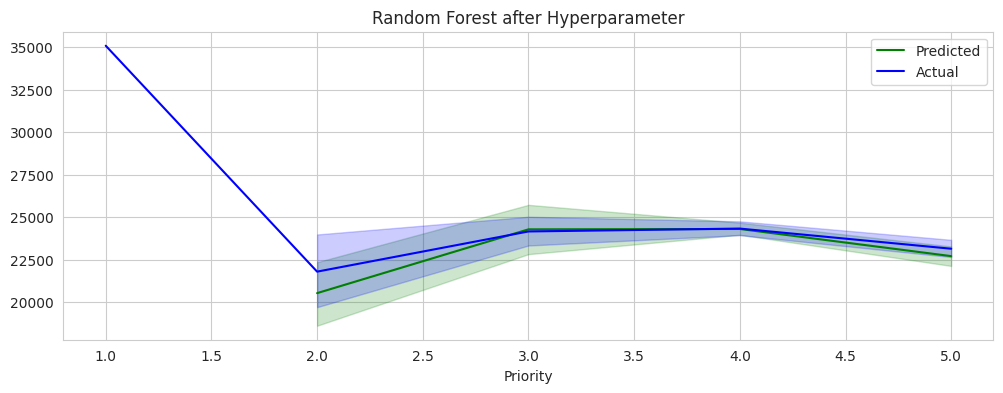

In [ ]:
# Graphical representation of Ytest and Ypred of Random Forest
plt.figure(figsize=(12,4))
plt.title('Random Forest after Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### **3rd Model: Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [ ]:
# Prediction of Test data
Ypred = GBC.predict(Xtest)
print(classification_report(Ytest,Ypred))
GBC_acc_score=accuracy_score(Ytest,Ypred)
print(GBC_acc_score)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.56      0.60      0.58       148
           3       0.78      0.29      0.42       966
           4       0.70      0.94      0.80      4073
           5       0.89      0.63      0.74      2786

    accuracy                           0.75      7974
   macro avg       0.59      0.49      0.51      7974
weighted avg       0.77      0.75      0.73      7974

0.745924253824931


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = GBC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# It is not overfitted so we do not need hyperparameter.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.58      0.63      0.61       535
           3       0.81      0.29      0.43      4000
           4       0.70      0.94      0.80     16230
           5       0.90      0.64      0.75     11128

    accuracy                           0.75     31894
   macro avg       0.80      0.70      0.72     31894
weighted avg       0.78      0.75      0.73     31894

0.7516774314918166


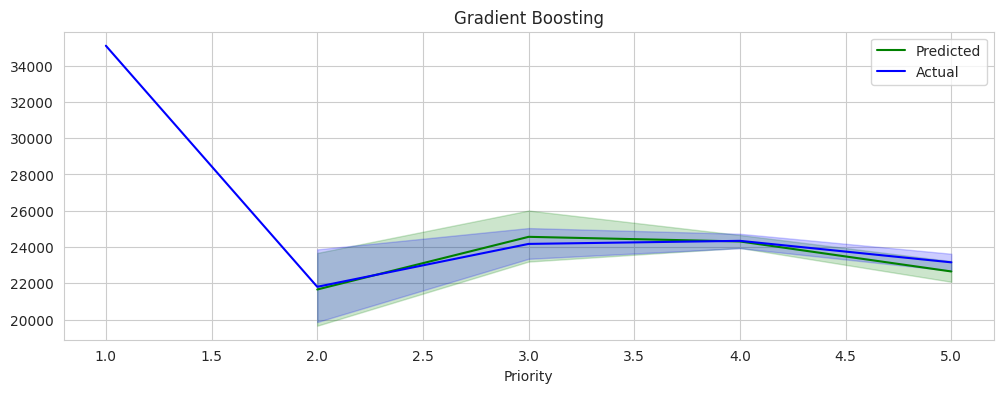

In [ ]:
# Graphical representation of Ytest and Ypred of Gradient Boosting
plt.figure(figsize=(12,4))
plt.title('Gradient Boosting')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

-------
## **Model Comparison Report (Predicting High Priority Tickets)**

In [ ]:
from tabulate import tabulate
data = [['Decision Tree',round(DTC_acc_score*100,2),round(DTC_acc_score_Hyper*100,2)],
 ['Random Forest',round(RFC_acc_score*100,2),round(RFC_acc_score_Hyper*100,2)],
  ['Gradient Boosting',round(GBC_acc_score*100,2),'NA']]

head = ['Model Name','Before Hyperparameter(%)','After Hyperparameter(%)']
print(tabulate(data,headers=head, tablefmt='grid'))

+-------------------+----------------------------+---------------------------+
| Model Name        |   Before Hyperparameter(%) | After Hyperparameter(%)   |
+===================+============================+===========================+
| Decision Tree     |                      67.48 | 73.1                      |
+-------------------+----------------------------+---------------------------+
| Random Forest     |                      69.6  | 74.94                     |
+-------------------+----------------------------+---------------------------+
| Gradient Boosting |                      74.59 | NA                        |
+-------------------+----------------------------+---------------------------+


--------
--------
## **Objective: Forecast the incident volume monthwise and Quarterwise (Time Series Analysis)**
--------
--------

In [ ]:
# We take dataset from SQL table:
print('Shape:',table.shape)
table.head()

Shape: (46606, 25)


,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [ ]:
# We will fetch CI_Cat and Open_Time features only.
data_TS=table[['CI_Cat','Open_Time']]
print('Shape:',data_TS.shape)
data_TS.head()

Shape: (46606, 2)


,CI_Cat,Open_Time
0,subapplication,05-02-2012 13:32
1,application,12-03-2012 15:44
2,application,29-03-2012 12:36
3,application,17-07-2012 11:49
4,application,10-08-2012 11:01


In [ ]:
# Convert datatime of Open_Time
data_TS['Open_Time']=pd.to_datetime(data_TS['Open_Time'])

In [ ]:
# Fetch monthwise from Open Time:
monthwise=[]
for x in data_TS['Open_Time']:
  y,z = x.year,x.month
  w = datetime(year=y, month=z, day=1)
  monthwise.append(w)
data_TS['Monthwise']=monthwise
data_TS.drop('Open_Time',axis=1,inplace=True)
print('Shape:',data_TS.shape)
data_TS

Shape: (46606, 2)


,CI_Cat,Monthwise
0,subapplication,2012-05-01
1,application,2012-12-01
2,application,2012-03-01
3,application,2012-07-01
4,application,2012-10-01
...,...,...
46601,application,2014-03-01
46602,application,2014-03-01
46603,computer,2014-03-01
46604,application,2014-03-01


In [ ]:
# Group Monthwise in ascending order
print('Rows after groupby:',len(data_TS.groupby('Monthwise')['CI_Cat'].count()))
group=data_TS.groupby('Monthwise')['CI_Cat'].count()
group.head()

Rows after groupby: 34


Monthwise
2012-01-01    1
2012-02-01    1
2012-03-01    2
2012-05-01    2
2012-07-01    2
Name: CI_Cat, dtype: int64

In [ ]:
# We are making dataset of total number of incidents based on months:
Monthwise = []
Incidents=[]
for x in range(34):
  Monthwise.append(group.index[x])
  Incidents.append(group[x])

Mdate = pd.DataFrame({'Monthwise':Monthwise,'Incidents':Incidents})
print('Shape:',Mdate.shape)
Mdate.set_index('Monthwise',inplace=True)
Mdate

Shape: (34, 2)


,Incidents
Monthwise,
2012-01-01,1
2012-02-01,1
2012-03-01,2
2012-05-01,2
2012-07-01,2
2012-08-01,3
2012-09-01,1
2012-10-01,6
2012-11-01,1


In [ ]:
# We will take data from 2013-01-01	because in year 2012 incidents is very less which affect forecasting compared to 2013 and 2014 year.
Mdate_N = Mdate['2013-01-01':]
print('Shape:',Mdate_N.shape)
Mdate_N

Shape: (24, 1)


,Incidents
Monthwise,
2013-01-01,764
2013-02-01,828
2013-03-01,869
2013-04-01,1196
2013-05-01,825
2013-06-01,796
2013-07-01,898
2013-08-01,761
2013-09-01,1516


<Figure size 1000x600 with 0 Axes>

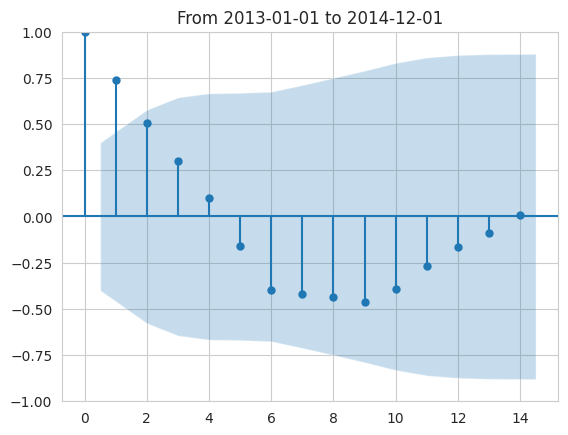

In [ ]:
# Checking Stationary of dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plot_acf(Mdate_N)
plt.title('From 2013-01-01 to 2014-12-01')
plt.show()
# It is not stationary from the below graph

In [ ]:
# Creating Training and Testing dataset.
Train=Mdate_N[:16]
Test=Mdate_N[16:]
print('Shape of Mdate:',Mdate_N.shape)
print('Shape of Train:',Train.shape)
print('Shape of Test:',Test.shape)

Shape of Mdate: (24, 1)
Shape of Train: (16, 1)
Shape of Test: (8, 1)


### **Model : ARIMA(AutoRegressive Integrated Moving Average)**

In [ ]:
# We will get the Optimal values of (p,d,q).
import warnings
warnings.filterwarnings('ignore')
import itertools
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

p = range(0,3)
d = range(0,3)
q = range(0,5)
pdq = list(itertools.product(p,d,q))

MSE = []
Parameter = []
for x in tqdm(pdq):
    Model = ARIMA(Train, order=x).fit()
    Predict = Model.forecast(steps=8)
    MSE.append(mean_squared_error(Test,Predict))
    Parameter.append(x)
    print(x)

  0%|          | 0/45 [00:00<?, ?it/s]

(0, 0, 0)


  4%|▍         | 2/45 [00:00<00:04,  8.74it/s]

(0, 0, 1)


  7%|▋         | 3/45 [00:00<00:08,  5.10it/s]

(0, 0, 2)


  9%|▉         | 4/45 [00:01<00:12,  3.34it/s]

(0, 0, 3)


 11%|█         | 5/45 [00:01<00:16,  2.45it/s]

(0, 0, 4)
(0, 1, 0)


 16%|█▌        | 7/45 [00:02<00:11,  3.29it/s]

(0, 1, 1)


 18%|█▊        | 8/45 [00:02<00:11,  3.29it/s]

(0, 1, 2)


 20%|██        | 9/45 [00:03<00:17,  2.07it/s]

(0, 1, 3)


 24%|██▍       | 11/45 [00:03<00:12,  2.73it/s]

(0, 1, 4)
(0, 2, 0)


 27%|██▋       | 12/45 [00:04<00:11,  2.86it/s]

(0, 2, 1)


 29%|██▉       | 13/45 [00:04<00:10,  3.01it/s]

(0, 2, 2)


 31%|███       | 14/45 [00:04<00:10,  2.87it/s]

(0, 2, 3)


 36%|███▌      | 16/45 [00:05<00:11,  2.57it/s]

(0, 2, 4)
(1, 0, 0)


 38%|███▊      | 17/45 [00:06<00:09,  2.92it/s]

(1, 0, 1)


 40%|████      | 18/45 [00:06<00:09,  2.84it/s]

(1, 0, 2)


 42%|████▏     | 19/45 [00:07<00:12,  2.01it/s]

(1, 0, 3)


 44%|████▍     | 20/45 [00:07<00:13,  1.79it/s]

(1, 0, 4)
(1, 1, 0)


 49%|████▉     | 22/45 [00:08<00:10,  2.20it/s]

(1, 1, 1)


 51%|█████     | 23/45 [00:08<00:09,  2.43it/s]

(1, 1, 2)


 53%|█████▎    | 24/45 [00:09<00:08,  2.60it/s]

(1, 1, 3)


 56%|█████▌    | 25/45 [00:09<00:07,  2.60it/s]

(1, 1, 4)
(1, 2, 0)


 60%|██████    | 27/45 [00:10<00:05,  3.24it/s]

(1, 2, 1)


 62%|██████▏   | 28/45 [00:10<00:07,  2.19it/s]

(1, 2, 2)


 64%|██████▍   | 29/45 [00:11<00:07,  2.13it/s]

(1, 2, 3)


 69%|██████▉   | 31/45 [00:12<00:06,  2.32it/s]

(1, 2, 4)
(2, 0, 0)


 71%|███████   | 32/45 [00:13<00:06,  1.91it/s]

(2, 0, 1)


 73%|███████▎  | 33/45 [00:13<00:06,  1.76it/s]

(2, 0, 2)


 76%|███████▌  | 34/45 [00:14<00:06,  1.64it/s]

(2, 0, 3)


 80%|████████  | 36/45 [00:15<00:04,  2.01it/s]

(2, 0, 4)
(2, 1, 0)


 82%|████████▏ | 37/45 [00:15<00:03,  2.13it/s]

(2, 1, 1)


 84%|████████▍ | 38/45 [00:16<00:03,  1.87it/s]

(2, 1, 2)


 87%|████████▋ | 39/45 [00:18<00:05,  1.15it/s]

(2, 1, 3)


 91%|█████████ | 41/45 [00:19<00:02,  1.44it/s]

(2, 1, 4)
(2, 2, 0)


 93%|█████████▎| 42/45 [00:19<00:01,  1.61it/s]

(2, 2, 1)


 96%|█████████▌| 43/45 [00:20<00:01,  1.23it/s]

(2, 2, 2)


 98%|█████████▊| 44/45 [00:21<00:00,  1.28it/s]

(2, 2, 3)


100%|██████████| 45/45 [00:22<00:00,  1.97it/s]

(2, 2, 4)


In [ ]:
# Least MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
Param=Parameter[Index]

MSE: 67265.1459405086 Index: 39
(p,d,q): (2, 1, 4)


In [ ]:
# Now Train model with this parameter for next 6 more months:
Model = ARIMA(Train, order=Param).fit()
Predict=Model.forecast(steps=14)

In [ ]:
# Merge Train data with Predict_df for graphical representation
Predict_df=pd.DataFrame({'Incidents':Predict})
Train_with_Predict=pd.concat([Train,Predict_df],axis=0)
print('Shape:',Train_with_Predict.shape)
Train_with_Predict.tail(10)

Shape: (30, 1)


,Incidents
2014-09-01,-25.322812
2014-10-01,528.317932
2014-11-01,925.395305
2014-12-01,634.543561
2015-01-01,252.197412
2015-02-01,352.553861
2015-03-01,666.475410
2015-04-01,686.779352
2015-05-01,460.035020
2015-06-01,376.535520


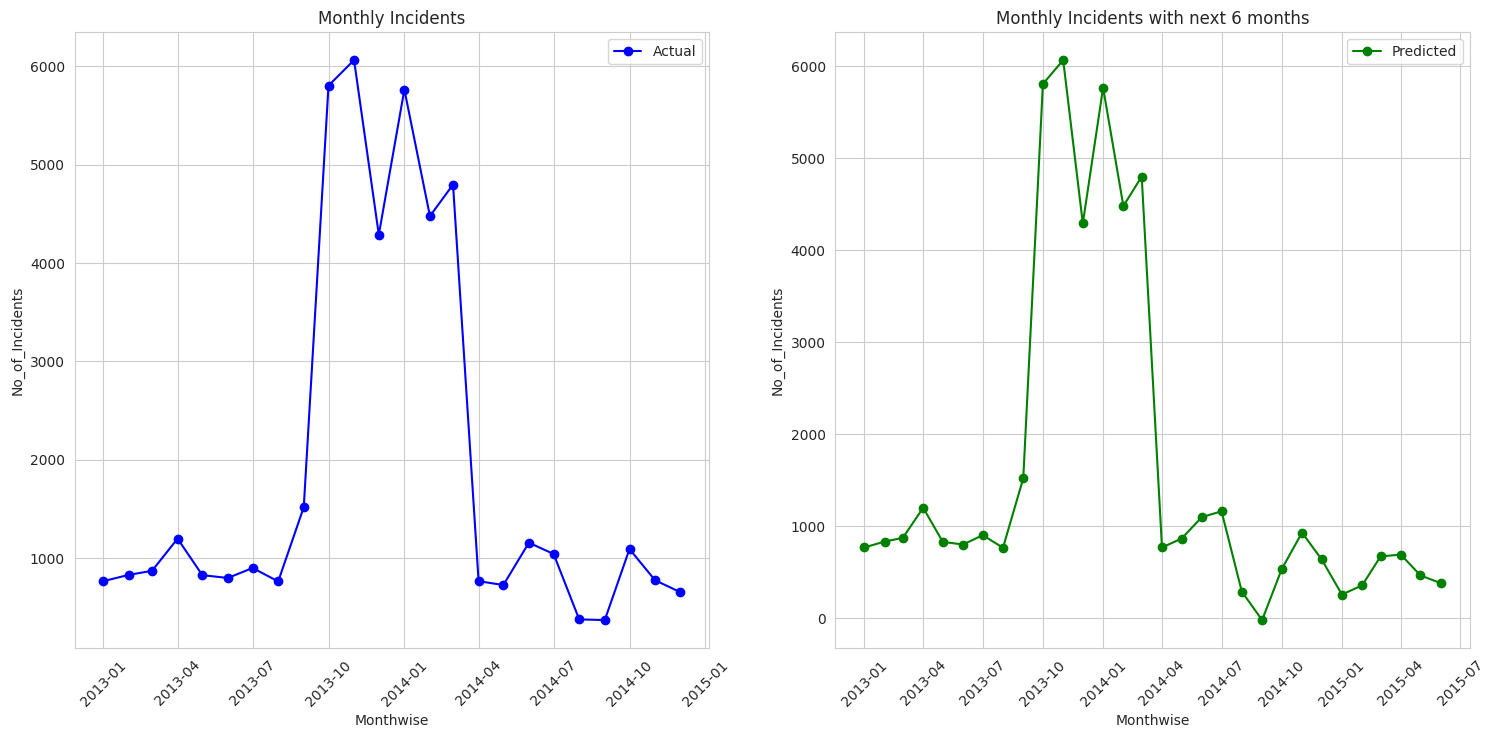

In [ ]:
# Graphical Representation of Train with predict and Mdate(Train and Test) dataset:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(Mdate_N.index, Mdate_N['Incidents'],color='blue',marker='o',label='Actual')
plt.title('Monthly Incidents')
plt.xlabel('Monthwise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Train_with_Predict.index, Train_with_Predict,color='green',marker='o',label='Predicted')
plt.title('Monthly Incidents with next 6 months')
plt.xlabel('Monthwise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.show()

--------
### **Next 6 Monthwise Prediction of Incidents:**

From the above graph we can analyse that monthly prediction of incidents are getting good results from 01-01-2015 to 01-06-2015.
```
2015-01-01     252.197412
2015-02-01     352.553861
2015-03-01     666.475410
2015-04-01     686.779352
2015-05-01     460.035020
2015-06-01     376.535520
```



--------
### **Quarterwise Incidents:**

In [ ]:
Mdate_quarterly = Mdate_N.resample('Q').sum()
Mdate_quarterly

,Incidents
Monthwise,
2013-03-31,2461
2013-06-30,2817
2013-09-30,3175
2013-12-31,16153
2014-03-31,15036
2014-06-30,2643
2014-09-30,1783
2014-12-31,2517


<Figure size 1000x600 with 0 Axes>

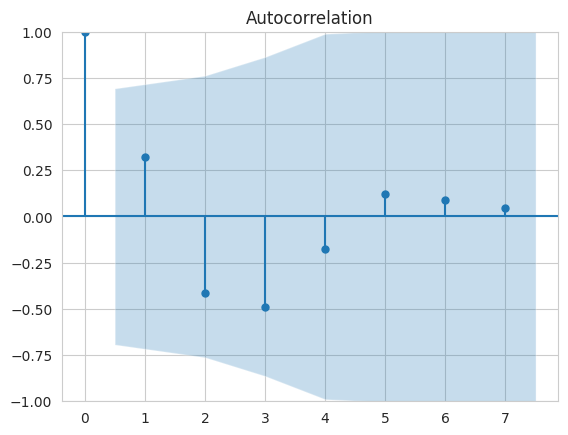

In [ ]:
# Checking Stationary of dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,6))
plot_acf(Mdate_quarterly)
plt.show()
# It is stationary from the below graph

In [ ]:
# Creating Training and Testing dataset.
QTrain=Mdate_quarterly[:5]
QTest=Mdate_quarterly[5:]
print('Shape of Mdate_quarterly:',Mdate_quarterly.shape)
print('Shape of Train:',QTrain.shape)
print('Shape of Test:',QTest.shape)

Shape of Mdate_quarterly: (8, 1)
Shape of Train: (5, 1)
Shape of Test: (3, 1)


In [ ]:
# We will get the Optimal values of (p,d,q).
p = range(0,4)
d = range(0,1)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

MSE = []
Parameter = []
for x in tqdm(pdq):
    Model = ARIMA(QTrain, order=x).fit()
    QPredict = Model.forecast(steps=3)
    MSE.append(mean_squared_error(QTest,QPredict))
    Parameter.append(x)
    print(x)

  8%|▊         | 1/12 [00:00<00:01,  9.40it/s]

(0, 0, 0)


 17%|█▋        | 2/12 [00:00<00:01,  5.05it/s]

(0, 0, 1)


 33%|███▎      | 4/12 [00:01<00:02,  3.70it/s]

(0, 0, 2)
(1, 0, 0)


 42%|████▏     | 5/12 [00:01<00:02,  2.66it/s]

(1, 0, 1)


 58%|█████▊    | 7/12 [00:02<00:01,  2.79it/s]

(1, 0, 2)
(2, 0, 0)


 67%|██████▋   | 8/12 [00:03<00:02,  1.87it/s]

(2, 0, 1)


 75%|███████▌  | 9/12 [00:03<00:01,  1.89it/s]

(2, 0, 2)


 83%|████████▎ | 10/12 [00:04<00:01,  1.73it/s]

(3, 0, 0)


 92%|█████████▏| 11/12 [00:05<00:00,  1.31it/s]

(3, 0, 1)


100%|██████████| 12/12 [00:06<00:00,  1.75it/s]

(3, 0, 2)


In [ ]:
# Least MSE with index and Best (p,d,q) combination:
print('MSE:',min(MSE),'Index:',np.argmin(MSE))
Index=np.argmin(MSE)
print('(p,d,q):',Parameter[Index])
QParam=Parameter[Index]

MSE: 8944383.895057699 Index: 7
(p,d,q): (2, 0, 1)


In [ ]:
# Now Train model with this parameter for next 3 quarters:
Model = ARIMA(QTrain, order=QParam).fit()
QPredict=Model.forecast(steps=6)

In [ ]:
# Merge Train data with Predict_df
QPredict_df=pd.DataFrame({'Incidents':QPredict})
QTrain_with_Predict=pd.concat([QTrain,QPredict_df],axis=0)
print('Shape:',QTrain_with_Predict.shape)

Shape: (11, 1)


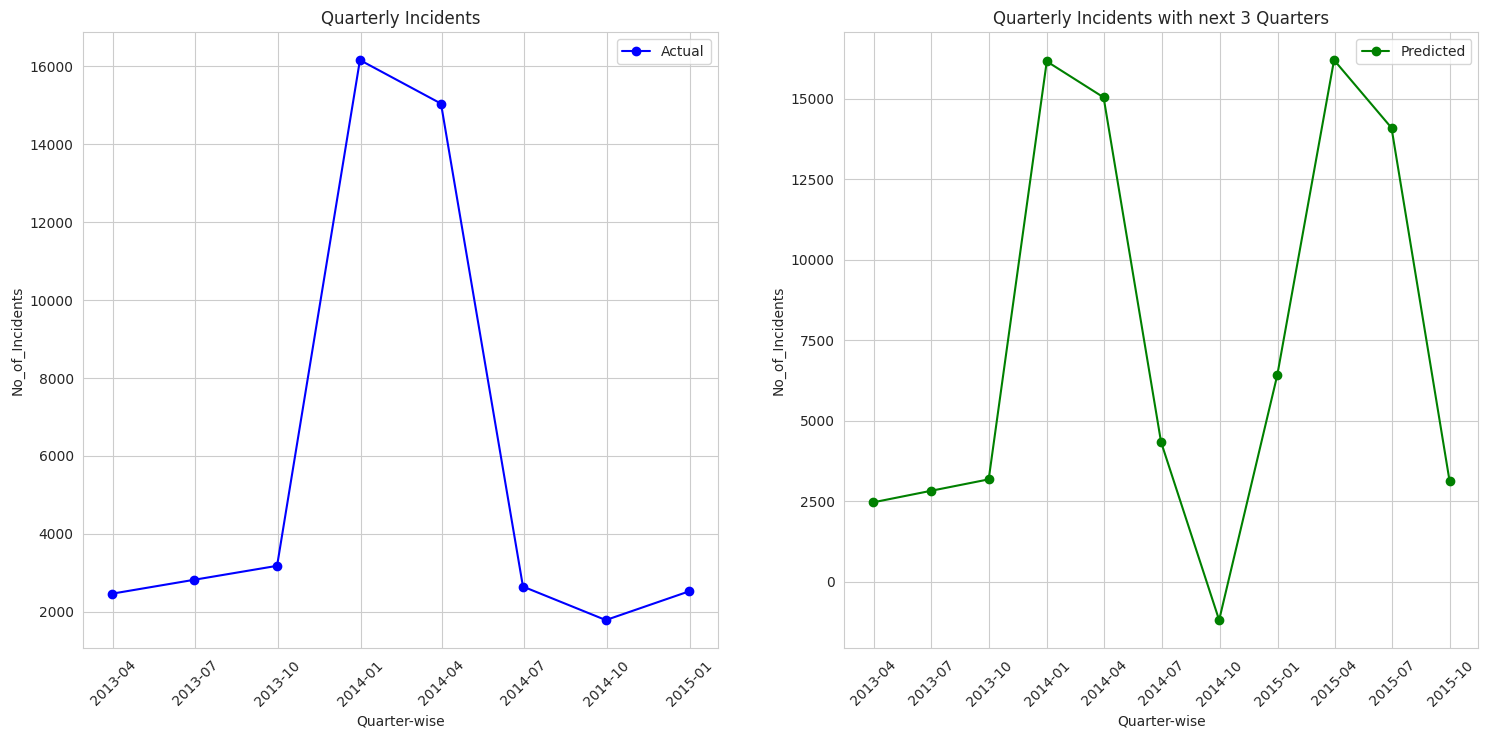

In [ ]:
# Graphical Representation of Train with predict and Mdate(Train and Test) dataset:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(Mdate_quarterly.index, Mdate_quarterly['Incidents'],color='blue',marker='o',label='Actual')
plt.legend()
plt.title('Quarterly Incidents')
plt.xlabel('Quarter-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.subplot(1,2,2)
plt.plot(QTrain_with_Predict.index, QTrain_with_Predict,color='green',marker='o',label='Predicted')
plt.title('Quarterly Incidents with next 3 Quarters')
plt.xlabel('Quarter-wise')
plt.xticks(rotation=45)
plt.ylabel('No_of_Incidents')
plt.legend()
plt.show()

--------
### **Next 3 Quarterwise Prediction of Incidents:**

From the above graph we can analyse that quarter wise result have variation on future prediction on next 3 quarters because we have very less dataset for Quarters.

```
2015-03-31    16193.964191
2015-06-30    14089.153918
2015-09-30     3120.236192
```



--------
--------
## **Objective: Auto tag the tickets with right priorities and right departments**
--------
--------

In [ ]:
# We are taking Data df From EDA which is clean dataset.
print('Shape:',df.shape)
df.head()

Shape: (39868, 14)


,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions
1,application,Web Based Application,Closed,3,3,3,incident,33.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1700.866667,Software,1.0
13,application,Web Based Application,Closed,4,4,4,incident,17.0,2012-10-15 15:50:00,2014-01-13 10:57:00,2013-11-14 13:33:00,6.200000,Software,1.0
27,application,Server Based Application,Closed,5,5,5,request for information,0.0,2013-06-02 14:07:00,2013-10-17 14:00:00,2013-10-17 14:00:00,3287.883333,No error - works as designed,2.0
28,application,Server Based Application,Closed,5,5,5,request for information,11.0,2013-08-02 10:47:00,2013-10-17 15:40:00,2013-10-17 15:40:00,1828.883333,Other,1.0
29,application,Server Based Application,Closed,5,5,5,request for information,2.0,2013-02-18 11:59:00,2014-01-13 10:57:00,2013-04-12 14:00:00,6.200000,Other,2.0


In [ ]:
# We only requires CI_Cat,CI_Subcat,Status,Priority,Category,Closure_Code,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
data=df[['CI_Cat','CI_Subcat','Priority','Category','No_of_Reassignments','Handle_Time_hrs','Closure_Code','No_of_Related_Interactions']]
print('Shape:',data.shape)
data.head()

Shape: (39868, 8)


,CI_Cat,CI_Subcat,Priority,Category,No_of_Reassignments,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions
1,application,Web Based Application,3,incident,33.0,1700.866667,Software,1.0
13,application,Web Based Application,4,incident,17.0,6.200000,Software,1.0
27,application,Server Based Application,5,request for information,0.0,3287.883333,No error - works as designed,2.0
28,application,Server Based Application,5,request for information,11.0,1828.883333,Other,1.0
29,application,Server Based Application,5,request for information,2.0,6.200000,Other,2.0


In [ ]:
# CI_Cat will be the Target, So,we are doing Label Encoding of CI_Cat:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
CI_Cat_LE = LE.fit_transform(data['CI_Cat'])
data['CI_Cat_LE']=CI_Cat_LE
data.head()

,CI_Cat,CI_Subcat,Priority,Category,No_of_Reassignments,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,CI_Cat_LE
1,application,Web Based Application,3,incident,33.0,1700.866667,Software,1.0,1
13,application,Web Based Application,4,incident,17.0,6.200000,Software,1.0,1
27,application,Server Based Application,5,request for information,0.0,3287.883333,No error - works as designed,2.0,1
28,application,Server Based Application,5,request for information,11.0,1828.883333,Other,1.0,1
29,application,Server Based Application,5,request for information,2.0,6.200000,Other,2.0,1


In [ ]:
# Since For this model we need right priorities and right departments. Thus No of Reassignments can be 0 or 1.
print('Dropping These Rows where No of Reassignments > 1 :',len(data[data['No_of_Reassignments']>1]))
data.drop(data[data['No_of_Reassignments']>1].index,axis=0,inplace=True)

Dropping These Rows where No of Reassignments > 1 : 8673


In [ ]:
# One hot encoding of these features will be required:
CI_Subcat = pd.get_dummies(data=data['CI_Subcat'])
Category = pd.get_dummies(data=data['Category'])
Closure_Code = pd.get_dummies(data=data['Closure_Code'])

In [ ]:
Auto_Tag_df=pd.concat([data,CI_Subcat,Category,Closure_Code],axis=1)
Auto_Tag_df.drop(['CI_Cat','CI_Subcat','Category','Closure_Code'],axis=1,inplace=True)
print('Shape:',Auto_Tag_df.shape)
Auto_Tag_df.head()

Shape: (31195, 79)


,Priority,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions,CI_Cat_LE,Automation Software,Banking Device,Citrix,Client Based Application,Controller,DataCenterEquipment,Database,Database Software,Desktop,Desktop Application,ESX Cluster,Encryption,Exchange,Firewall,IPtelephony,Instance,Iptelephony,KVM Switches,Keyboard,Laptop,Lines,Linux Server,MQ Queue Manager,MigratieDummy,Modem,Monitor,Neoview Server,Net Device,Network Component,NonStop Harddisk,NonStop Server,Number,Omgeving,Printer,Protocol,RAC Service,Router,SAN,SAP,Scanner,Security Software,Server Based Application,SharePoint Farm,Standard Application,Switch,System Software,Tape Library,Thin Client,UPS,Unix Server,VDI,Web Based Application,Windows Server,X86 Server,zOS Cluster,zOS Server,zOS Systeem,complaint,incident,request for change,request for information,Data,Hardware,Inquiry,Kwaliteit van de output,No error - works as designed,Operator error,Other,Questions,Referred,Software,Unknown,User error,User manual not used
27,5,0.0,3287.883333,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
55,4,1.0,2756.800000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
60,3,1.0,3364.200000,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
83,3,1.0,3510.300000,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
107,3,1.0,2188.383333,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Checking Target CI_Cat value_counts()
data['CI_Cat'].value_counts()

application             21266
subapplication           6153
computer                 2296
storage                   551
hardware                  257
software                  227
database                  125
displaydevice             122
officeelectronics         122
networkcomponents          74
applicationcomponent        1
Phone                       1
Name: CI_Cat, dtype: int64

------
## **Model Creation**

**1) Decision Tree**

**2) Random Forest**

**3) Gradient Boosting**

In [ ]:
# Model Creation (Target: CI_Cat_LE):
X=Auto_Tag_df.drop('CI_Cat_LE',axis=1)
Y=Auto_Tag_df['CI_Cat_LE']
print('Value counts of CI_Cat after Label encoding','\n')
Y.value_counts()

Value counts of CI_Cat after Label encoding 



1     21266
11     6153
3      2296
10      551
6       257
9       227
4       125
5       122
8       122
7        74
2         1
0         1
Name: CI_Cat_LE, dtype: int64

In [ ]:
# We have to scale entire dataset between 0 to 1 that is MinMAx scaling because Handle_Time_hrs feature should not goes below zero.
# After scaling we got dataset into array format so we converted that dataset into dataframe also.
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
X_scaled=MMS.fit_transform(X)
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns)
print('Shape:',X_scaled_df.shape)
X_scaled_df.head()

Shape: (31195, 78)


,Priority,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions,Automation Software,Banking Device,Citrix,Client Based Application,Controller,DataCenterEquipment,Database,Database Software,Desktop,Desktop Application,ESX Cluster,Encryption,Exchange,Firewall,IPtelephony,Instance,Iptelephony,KVM Switches,Keyboard,Laptop,Lines,Linux Server,MQ Queue Manager,MigratieDummy,Modem,Monitor,Neoview Server,Net Device,Network Component,NonStop Harddisk,NonStop Server,Number,Omgeving,Printer,Protocol,RAC Service,Router,SAN,SAP,Scanner,Security Software,Server Based Application,SharePoint Farm,Standard Application,Switch,System Software,Tape Library,Thin Client,UPS,Unix Server,VDI,Web Based Application,Windows Server,X86 Server,zOS Cluster,zOS Server,zOS Systeem,complaint,incident,request for change,request for information,Data,Hardware,Inquiry,Kwaliteit van de output,No error - works as designed,Operator error,Other,Questions,Referred,Software,Unknown,User error,User manual not used
0,1.00,0.0,0.751447,0.008547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.75,1.0,0.630068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,1.0,0.768890,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,1.0,0.802281,0.017094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,1.0,0.500156,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# We took 80% dataset for training purpose and remaining 20% dataset for testing purpose because our dataset is very small.
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_scaled_df,Y,test_size=0.20)
print('Xtrain shape:',Xtrain.shape)
print('Xtest shape:',Xtest.shape)

Xtrain shape: (24956, 78)
Xtest shape: (6239, 78)


### **1st Model: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
# Prediction of Test data
Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_accu_AT=accuracy_score(Ytest,Ypred)
print(DTC_accu_AT)

              precision    recall  f1-score   support

           1       0.86      0.89      0.87      4292
           3       1.00      1.00      1.00       435
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        24
           6       0.98      0.98      0.98        50
           7       0.91      0.91      0.91        11
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        40
          10       1.00      0.99      1.00       116
          11       0.57      0.51      0.54      1228

    accuracy                           0.83      6239
   macro avg       0.93      0.92      0.93      6239
weighted avg       0.82      0.83      0.82      6239

0.8252925148260939


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# Model overfitted since training accuracy is 94% while testing accuracy is 83%. So we will apply Hyperparameter.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.94      0.97      0.96     16974
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00      1861
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        98
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       187
          10       1.00      1.00      1.00       435
          11       0.89      0.79      0.84      4925

    accuracy                           0.94     24956
   macro avg       0.99      0.98      0.98     24956
weighted avg       0.94      0.94      0.94     24956

0.9397339317198269


In [ ]:
# Hyperparameter of Decision Tree : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
#                                   we make grid and then fit the model into it, and then predict the testing accuracy.

from sklearn.model_selection import RandomizedSearchCV
parameter = {"criterion":('gini','entropy'),"splitter":("best","random"),"max_depth":(list(range(8, 18))),
             "min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
DTC=DecisionTreeClassifier()
Grid=RandomizedSearchCV(estimator=DTC,param_distributions=parameter,scoring="f1",cv=3,random_state=42)
Grid.fit(Xtrain,Ytrain)
print(Grid.best_params_)

{'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 15, 'criterion': 'entropy'}


In [ ]:
DTC_params=['splitter: best, min_samples_split:3, min_samples_leaf:4, max_depth:15, criterion: entropy']
print('Best parameter for Random Foreset:','\n',DTC_params)

Best parameter for Random Foreset: 
 ['splitter: best, min_samples_split:3, min_samples_leaf:4, max_depth:15, criterion: entropy']


In [ ]:
# We put these best parameter and then train model again.
DTC = DecisionTreeClassifier(splitter='best',min_samples_split=3,min_samples_leaf=4,max_depth=15,criterion='entropy')
DTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=3)

In [ ]:
# Prediction of Test data
Ypred = DTC.predict(Xtest)
print(classification_report(Ytest,Ypred))
DTC_accu_AT_Hyper=accuracy_score(Ytest,Ypred)
print(DTC_accu_AT_Hyper)

              precision    recall  f1-score   support

           1       0.84      0.95      0.89      4292
           3       1.00      0.88      0.94       435
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        24
           6       0.32      1.00      0.49        50
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        23
           9       1.00      0.90      0.95        40
          10       1.00      0.98      0.99       116
          11       0.66      0.34      0.45      1228

    accuracy                           0.82      6239
   macro avg       0.68      0.70      0.67      6239
weighted avg       0.81      0.82      0.80      6239

0.8203237698349094


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = DTC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# It is not overfitted.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.85      0.97      0.91     16974
           2       0.00      0.00      0.00         1
           3       1.00      0.89      0.94      1861
           4       1.00      0.99      1.00       105
           5       1.00      1.00      1.00        98
           6       0.32      1.00      0.48       207
           7       0.00      0.00      0.00        63
           8       0.00      0.00      0.00        99
           9       1.00      0.80      0.89       187
          10       1.00      0.99      1.00       435
          11       0.81      0.41      0.55      4925

    accuracy                           0.85     24956
   macro avg       0.58      0.59      0.56     24956
weighted avg       0.85      0.85      0.83     24956

0.8475717262381792


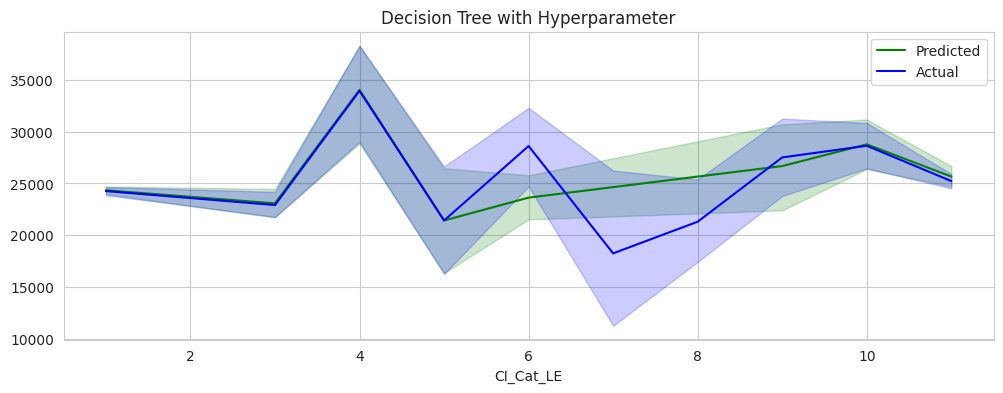

In [ ]:
# Graphical representation of Ytest and Ypred for Decision Tree
plt.figure(figsize=(12,4))
plt.title('Decision Tree with Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### **2nd Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
# Prediction of Test data
Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_accu_AT=accuracy_score(Ytest,Ypred)
print(RFC_accu_AT)

              precision    recall  f1-score   support

           1       0.87      0.88      0.87      4292
           3       1.00      1.00      1.00       435
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        24
           6       1.00      0.98      0.99        50
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        40
          10       1.00      0.99      1.00       116
          11       0.56      0.54      0.55      1228

    accuracy                           0.83      6239
   macro avg       0.94      0.92      0.93      6239
weighted avg       0.82      0.83      0.82      6239

0.8262542074050329


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# Model overfitted since training accuracy is 94% while testing accuracy is 83%. So we will apply Hyperparameter.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.95      0.96      0.96     16974
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00      1861
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        98
           6       1.00      1.00      1.00       207
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       187
          10       1.00      1.00      1.00       435
          11       0.86      0.82      0.84      4925

    accuracy                           0.94     24956
   macro avg       0.98      0.98      0.98     24956
weighted avg       0.94      0.94      0.94     24956

0.9396137201474595


In [ ]:
# Hyperparameter of Random Forest : We define RandomsearchCV for faster result, and set the parameters range accordingly after that
#                                   we make grid and then fit the model into it, and then predict the testing accuracy.

from sklearn.model_selection import RandomizedSearchCV
parameter = {"n_estimators":[100,200,300,400,500,600],"max_features":['auto', 'sqrt'],"bootstrap":[True, False],"criterion":('gini','entropy'),
             "max_depth":(list(range(8, 18))),"min_samples_split":(list(range(2,6))),"min_samples_leaf":(list(range(1, 5)))}
RFC=RandomForestClassifier()
Grid=RandomizedSearchCV(estimator=RFC,param_distributions=parameter,scoring="f1",cv=3,verbose=1,random_state=42)
Grid.fit(Xtrain,Ytrain)
print(Grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': False}


In [ ]:
RFC_params=['n_estimators:500, min_samples_split:5, min_samples_leaf:3, max_features:sqrt, max_depth:15, criterion: entropy, bootstrap:False']
print('Best parameter for Random Foreset:','\n',RFC_params)

Best parameter for Random Foreset: 
 ['n_estimators:500, min_samples_split:5, min_samples_leaf:3, max_features:sqrt, max_depth:15, criterion: entropy, bootstrap:False']


In [ ]:
# We put these best parameter and then train model again.
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=500,min_samples_split=5,min_samples_leaf=3,max_features='sqrt',max_depth=15,criterion='entropy',bootstrap=False)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=500)

In [ ]:
# Prediction of Test data
Ypred = RFC.predict(Xtest)
print(classification_report(Ytest,Ypred))
RFC_accu_AT_Hyper=accuracy_score(Ytest,Ypred)
print(RFC_accu_AT_Hyper)

              precision    recall  f1-score   support

           1       0.82      0.98      0.89      4292
           3       0.99      0.93      0.96       435
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        24
           6       1.00      0.62      0.77        50
           7       1.00      0.27      0.43        11
           8       1.00      0.91      0.95        23
           9       1.00      0.95      0.97        40
          10       1.00      0.98      0.99       116
          11       0.78      0.28      0.41      1228

    accuracy                           0.83      6239
   macro avg       0.96      0.79      0.84      6239
weighted avg       0.83      0.83      0.80      6239

0.8323449270716461


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = RFC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# It is not overfitted.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      0.98      0.90     16974
           2       0.00      0.00      0.00         1
           3       0.99      0.95      0.97      1861
           4       1.00      0.99      1.00       105
           5       1.00      1.00      1.00        98
           6       1.00      0.76      0.86       207
           7       1.00      0.24      0.38        63
           8       1.00      0.90      0.95        99
           9       1.00      0.89      0.94       187
          10       1.00      0.99      0.99       435
          11       0.86      0.33      0.47      4925

    accuracy                           0.85     24956
   macro avg       0.81      0.67      0.71     24956
weighted avg       0.85      0.85      0.82     24956

0.8472511620451996


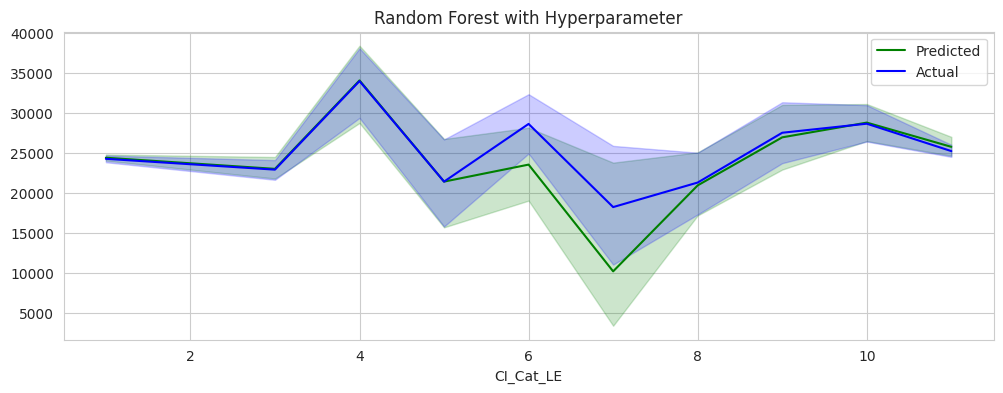

In [ ]:
# Graphical representation of Ytest and Ypred of Random Forest
plt.figure(figsize=(12,4))
plt.title('Random Forest with Hyperparameter')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

### **3rd Model: Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(Xtrain,Ytrain)

GradientBoostingClassifier()

In [ ]:
# Prediction of Test data
Ypred = GBC.predict(Xtest)
print(classification_report(Ytest,Ypred))
GBC_accu_AT=accuracy_score(Ytest,Ypred)
print(GBC_accu_AT)

              precision    recall  f1-score   support

           1       0.85      0.94      0.89      4292
           3       1.00      1.00      1.00       435
           4       1.00      0.95      0.97        20
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        50
           7       1.00      0.73      0.84        11
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        40
          10       0.97      0.99      0.98       116
          11       0.65      0.42      0.51      1228

    accuracy                           0.84      6239
   macro avg       0.95      0.90      0.92      6239
weighted avg       0.83      0.84      0.83      6239

0.8408398781856067


In [ ]:
# Checking Overfitting/Underfitting from train data
Ypred_train = GBC.predict(Xtrain)
print(classification_report(Ytrain,Ypred_train))
print(accuracy_score(Ytrain,Ypred_train))
# It is not overfitted.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      0.94      0.89     16974
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00      1861
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        98
           6       1.00      1.00      1.00       207
           7       1.00      0.76      0.86        63
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       187
          10       0.97      1.00      0.98       435
          11       0.66      0.43      0.52      4925

    accuracy                           0.84     24956
   macro avg       0.96      0.93      0.94     24956
weighted avg       0.83      0.84      0.83     24956

0.8436047443500561


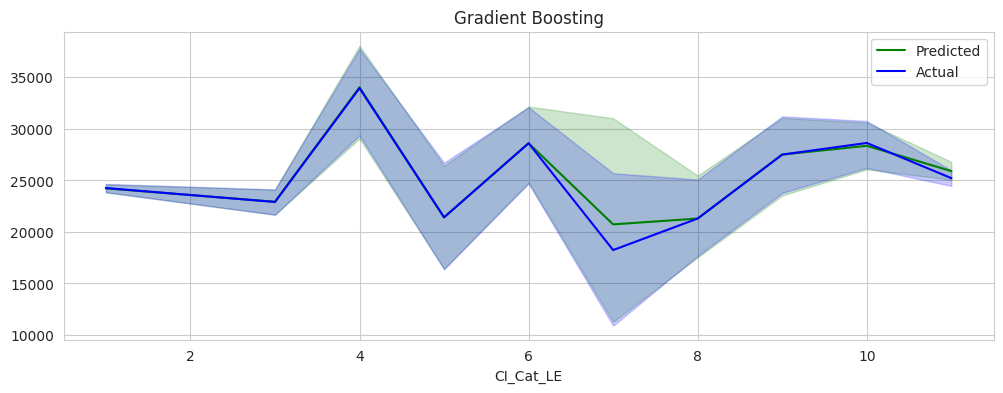

In [ ]:
# Graphical representation of Ytest and Ypred of Gradient Boosting
plt.figure(figsize=(12,4))
plt.title('Gradient Boosting')
sns.lineplot(x=Ypred,y=Ytest.index,color='green',label='Predicted')
sns.lineplot(x=Ytest,y=Ytest.index,color='blue',label='Actual')
plt.legend()
plt.show()

-------
## **Model Comparison Report (Auto tag the tickets with right priorities and right departments)**

In [ ]:
from tabulate import tabulate
data = [['Decision Tree',round(DTC_accu_AT*100,2),round(DTC_accu_AT_Hyper*100,2)],
 ['Random Forest',round(RFC_accu_AT*100,2),round(RFC_accu_AT_Hyper*100,2)],
  ['Gradient Boosting',round(GBC_accu_AT*100,2),'NA']]

head = ['Model Name','Before Hyperparameter(%)','After Hyperparameter(%)']
print(tabulate(data,headers=head, tablefmt='grid'))

+-------------------+----------------------------+---------------------------+
| Model Name        |   Before Hyperparameter(%) | After Hyperparameter(%)   |
+===================+============================+===========================+
| Decision Tree     |                      82.53 | 82.03                     |
+-------------------+----------------------------+---------------------------+
| Random Forest     |                      82.63 | 83.23                     |
+-------------------+----------------------------+---------------------------+
| Gradient Boosting |                      84.08 | NA                        |
+-------------------+----------------------------+---------------------------+


-------------
-------------
# **Project Summary:**


## **Predicting High Priority Tickets:**


1) Dataset have initial shape of (46605 , 25) with Priority as Target.

2) We have some empty values in some features in the dataset, so we have to convert that empty cells into null values. Also there is no duplicate values in dataset.

3) Features (Reopen_Time, No_of_Related_Incidents, No_of_Related_Changes, Related_Change) have more than 95% null values so we drop these.

4) Features (CI_Name, WBS, Incident_ID, number_cnt, KB_number, Related_Interaction, Alert_Status) have Number,ID,constant unique valus, so we drop these.

5) Priority is our target variable but it have NA(Not applicable) unique values so we remove that 1380 rows.

6) Urgency have unique value of 5 and 5-very low which we merge rows into 5 unique only.

7) After that we converted datatype of each features into integer and datetime accordingly.

8) We deleted 8.258% rows where open Time is greater than Resolved time because it is not possible, since Resolve time always greater than Open Time.

9) We calculate our own Handle Time hrs from Open Time and Resolved Time, since given Handle time hrs is not understood in the dataset.

10) From boxplot analysis for handle time hrs, we cannot use standard methods like IQR method because it remove almost 40% of rows, so we decided only 6 month (4380 hr) period for this model and drop 1621 rows where handle time hr is greater than 4380 hr.

11) Impute Null value with mode for (CI_Cat, CI_Subcat, Closure_Code) and median for (No_of_Reassignments, Resolved_Time, Handle_Time_hrs, No_of_Related_Interactions).

12) Now Divide df into categorical and numerical features and perform EDA part for categorical and numerical features accordingly.

13) Priority, Urgency and Impact have high (>98%) correlation with each other. So dropping Urgency and Impact features.

14) We re-created Handle_Time_hrs from Open_Time, Resolved_Time so we do not need of these (Open_Time, Close_Time, Resolve_Time) features.

15) Features (CI_Cat, CI_Subcat, Category, Closure_Code) are not ordinal data so we cannot apply label encoding and perform One hot encoding on each.

16) We have to scale entire dataset between 0 to 1 that is MinMAx scaling because Handle_Time_hrs feature should not goes below zero.

17) In Model creation, we apply Decision Tree, but it is overfitted since training accuracy is 94% while testing accuracy is 68%. So we will apply Hyperparameter, and after that we got 73% testing accuracy and 77% training accuracy.

18) In Model creation, we apply Random Forest, but it is overfitted since training accuracy is 94% while testing accuracy is 70%. So we will apply Hyperparameter, and after that we got 75% testing accuracy and 76% training accuracy.

19) In Model creation, we apply Gradient Boosting, and it have 74.59% accuracy in testing and 75.16% accuracy in training so we don't need Hyperparameter.


```
Model Comparison Report (Predicting High Priority Tickets):
+-------------------+----------------------------+---------------------------+
| Model Name        |   Before Hyperparameter(%) | After Hyperparameter(%)   |
+===================+============================+===========================+
| Decision Tree     |                      67.48 | 73.1                      |
+-------------------+----------------------------+---------------------------+
| Random Forest     |                      69.6  | 74.94                     |
+-------------------+----------------------------+---------------------------+
| Gradient Boosting |                      74.59 | NA                        |
+-------------------+----------------------------+---------------------------+
```


## **Forecasting Incidents Monthwise and Quaterwise:**


1) We take dataset as table directly from SQL.

2) We need (CI_Cat, Open_Time) features for forecasting of Incidents.

3) In open Time feature we have datetime in this format (dd-mm-yyyy hr:min), so we converted it into (yyyy-mm-dd).

4) We need monthwise forcasting so we converted 46606 rows into 34 rows based on category and incidents using groupby and after that we have monthwise with Incidents of year (2012,2013,2014).

5) From ACF plot we analyse that dataset is not stationary, and we need differencing to make it stationary.

6) Since 2012 have very much low incidents in range (1 to 6) compared to 2013,2014 years where incidents range (700 to 6100), so we have to remove 10 rows of 2012 years, because it will acts as an outliers and disrupt the forecasting.

7) Model ARIMA(AutoRegressive Integrated Moving Average) we applied with hyperparameter to find (p,d,q) by making different combinations, and we got best parameter (p,d,q):(2, 1, 4) with 1 differencing to make it stationary and applied it into ARIMA model.

8) We got Monthwise prediction of incidents from (01-01-2015 to 01-06-2015) with good graph and results.

9) Now we will Predict Quarter wise incidents and for that we make 8 rows based on 24 rows present in 2013 and 2014 years from monthwise.

10) From ACF plot we analyse dataset is stationary, so we do not need differencing.

11) Model  ARIMA(AutoRegressive Integrated Moving Average) we applied with hyperparameter to find (p,d,q) by making different combinations, and we got best parameter (p,d,q):(2, 0, 2) with 0 differencing and applied it into ARIMA model.

12) We got Quarterwise prediction of incidents for (2015-03-31,2015-06-30,2015-09-30) with good graph and results.

```
Next 6 Monthwise Prediction of Incidents:
2015-01-01     252.197412
2015-02-01     352.553861
2015-03-01     666.475410
2015-04-01     686.779352
2015-05-01     460.035020
2015-06-01     376.535520

Next 3 Quarterwise Prediction of Incidents:
2015-03-31    16193.964191
2015-06-30    14089.153918
2015-09-30     3120.236192
```


## **Auto Tag the Tickets with right Priorities and right Departments:**


1) We only requires (CI_Cat, CI_Subcat, Priority, Category, No_of_Reassignments, Handle_Time_hrs, Closure_Code, No_of_Related_Interactions) for Auto Tag.

2) CI_Cat will be the Target, So,we are doing Label Encoding of CI_Cat, since it is not ordinal data.

3) Since For this model we need right priorities and right departments. Thus No of Reassignments can be 0 or 1 so we drop 8673 rows where No of Reassignments greater than 1.

4) One hot encoding of these (CI_Subcat, Category, Closure_Code) features will be required, since it is not ordinal data.

5) We have to scale entire dataset between 0 to 1 that is MinMAx scaling because Handle_Time_hrs feature should not goes below zero.

6) In Model creation, we apply Decision Tree, but it is overfitted since training accuracy is 94% while testing accuracy is 83%. So we will apply Hyperparameter, and after that we got 82% testing accuracy and 85% training accuracy.

7) In Model creation, we apply Random Forest, but it is overfitted since training accuracy is 94% while testing accuracy is 83%. So we will apply Hyperparameter, and after that we got 83% testing accuracy and 85% training accuracy.

8) In Model creation, we apply Gradient Boosting, and it have testing accuracy of 84.08% and training accuracy of 84.36%, so we don't need Hyperparameter.

```
Model Comparison Report (Auto tag the tickets with right priorities and right departments):
+-------------------+----------------------------+---------------------------+
| Model Name        |   Before Hyperparameter(%) | After Hyperparameter(%)   |
+===================+============================+===========================+
| Decision Tree     |                      82.53 | 82.03                     |
+-------------------+----------------------------+---------------------------+
| Random Forest     |                      82.63 | 83.23                     |
+-------------------+----------------------------+---------------------------+
| Gradient Boosting |                      84.08 | NA                        |
+-------------------+----------------------------+---------------------------+
```

-------
-------

## **Challenges Faced:**

1) Empty cell present in features but not showing in isnull().sum() code , so we have to perform logic to show it into null values.

2) Given handle time hr is not understood so we create our own handle time from open time and resolve time.

3) Selecting best parameter range for Hyperparameter tuning in Decision Tree and Random Forest model for High priority Tickets and Auto Tag objectives.

4) Creating Monthwise features with incidents from open time and CI_Cat is tricky and requires logic.

5) Creating Quarterwise features with incidents from open time and CI_Cat is tricky and require logic.

-------
-------

## Thank You ✌